Mehwish Shabir

Lab_Task_7:
Analysing stock data for The Walt Disney Company (DIS) using Long
Short-Term Memory (LSTM) neural networks.

In [34]:
import pandas as pd

# Load historical stock data for Disney
input_file = "DIS.csv"
df = pd.read_csv(input_file, header=None, index_col=None, delimiter=',')


In [35]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Take close price column
all_y = df[5].values

In [36]:
all_y.shape

(5035,)

In [37]:
dataset = all_y.reshape(-1, 1)

In [38]:
dataset.shape

(5035, 1)

In [39]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Take close price column
all_y = df[5].values
dataset = all_y.reshape(-1, 1)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [41]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define the create_dataset function
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Reshape data for LSTM
look_back = 240
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')


In [42]:
# Train the LSTM network
model.fit(trainX, trainY, epochs=1000, batch_size=240, verbose=1)


Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0091
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.5669e-04 
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3695e-04 
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4827e-04 
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9562e-04 
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4140e-04 
Epoch 10/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9675e-04 
Epoch 11/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9793e-04 
Epoch 12/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7171e-04 
Epoch 13/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4595e-04 
Epoch 14/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3890e-04 
Epoc

In [33]:
from sklearn.metrics import mean_squared_error
import math

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train Score: 0.49 RMSE
Test Score: 14.47 RMSE


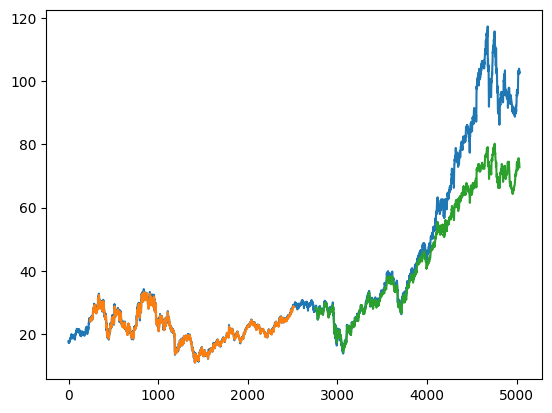

In [43]:
import matplotlib.pyplot as plt

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
